# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [8]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [9]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


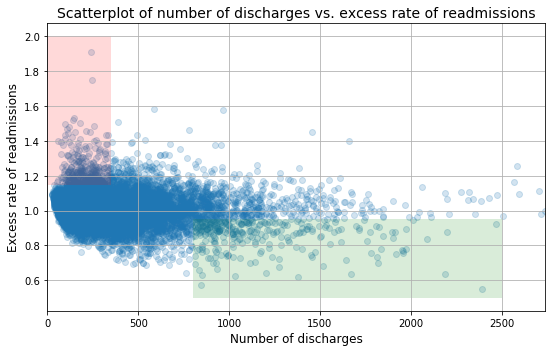

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

****

## A. Do you agree with the above analysis and recommendations? Why or why not?



**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**What I think:**
+ **No** it does not look like there is a significant correlation between hospital capacity and readmission rates to me. This has to be tested.


**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.
****


**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 


In [77]:
stats.pearsonr(clean_hospital_read_df['Number of Discharges'][81:-3],clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

(-0.09309554287590441, 1.5022756426464526e-23)

**Answer:** 
+ The Pearson correlation coefficient was calculated to be -0.093, and the p-value for testing non-correlation is 1.5e-23. Base on this result, we can conclude that there is a correlation between number of discharges and rate of readmissions, with the rate tends to go down as the number of discharges increases.

+ The red shaded area may indicate that with lower number of discharges, there is a greater incidence of excess rate of readmissions. However, the green shaded area is not convincing enough to conclude that there is a greater incidence of lower rates of readmissions for hospitals with higher number of discharges.

****

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 


In [84]:
small_hospital = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
big_hospital = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]

print(len(clean_hospital_read_df))
print(len(small_hospital))
print(len(big_hospital))

11578
1269
463


In [87]:
np.mean(small_hospital['Excess Readmission Ratio'])

1.0226183501683506

In [85]:
np.mean(big_hospital['Excess Readmission Ratio'])

0.9783354211663071

**1. Setup an appropriate hypothesis test.**

+ **Null hypothesis:** there is no significant difference in the excess rate of readmission between small hospitals (number of discharges < 100) and large hospitals (number of discharges > 1000)


+ **Alternative hypothesis:** the excess rate of readmission is higher for small hospitals than large hospitals 


**Bootstraping** would be used here

In [88]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [89]:
# Bootstrap Replicates Function
def draw_bs_reps(data,func,size=1):
    """Draw bootstrap replicates"""
    
    #Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    #Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data,size=len(data)))
        
    return bs_replicates

In [90]:
small_hospital_rate = small_hospital['Excess Readmission Ratio'][81:]
big_hospital_rate = big_hospital['Excess Readmission Ratio']

the following 3 values must be the same
mean_rate =  1.0101998182919443
mean_small_hospital_rate_shifted =  1.010199818291945
mean_big_hospital_rate_shifted =  1.0101998182919438


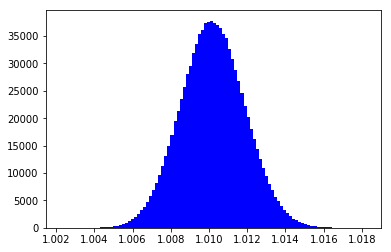

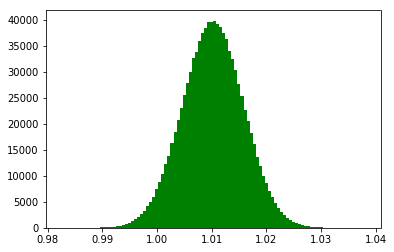

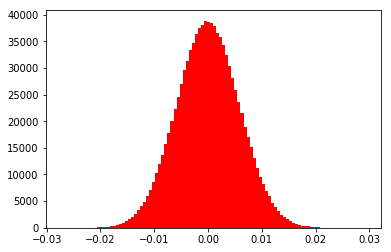

[-0.01137262  0.01145265]
95% confident that the observed difference in the mean readmission rates between 2 groups is in the range  [-0.01137262  0.01145265] if the expected readmission rates for small and big hospitals are the same

margin of error (defined as the radius of the confidence interval) =  0.011452654796707325

observed difference between readmission rates =  0.04428292900204345
p-value = 0.0


In [91]:
# Compute the observed difference in excess readmission rates btw 2 groups of hospitals
obs_diff_rate = np.mean(small_hospital_rate) - np.mean(big_hospital_rate)

# Compute mean excess readmission rate of all groups: mean_rate
mean_rate = (np.nansum(small_hospital_rate)+np.nansum(big_hospital_rate))/(len(small_hospital_rate)+len(big_hospital_rate))

# Generate shifted arrays
small_hospital_rate_shifted = small_hospital_rate - np.mean(small_hospital_rate) + mean_rate
big_hospital_rate_shifted = big_hospital_rate - np.mean(big_hospital_rate) + mean_rate

# Check 
print('the following 3 values must be the same')
print('mean_rate = ',mean_rate)
print('mean_small_hospital_rate_shifted = ',np.mean(small_hospital_rate_shifted))
print('mean_big_hospital_rate_shifted = ',np.mean(big_hospital_rate_shifted))

# Compute 1,000,000 bootstrap replicates from shifted arrays
bs_reps_small_hospital_rate = draw_bs_reps(small_hospital_rate_shifted, np.mean, size=1000000)
bs_reps_big_hospital_rate = draw_bs_reps(big_hospital_rate_shifted, np.mean, size=1000000)

# Plot histograph of bs_replicates for testing
plt.clf()
plt.hist(bs_reps_small_hospital_rate,bins=100, color = 'blue')
plt.show()

plt.hist(bs_reps_big_hospital_rate,bins=100, color = 'green')
plt.show()

# Get replicates of difference of means: bs_replicates
bs_reps = bs_reps_small_hospital_rate - bs_reps_big_hospital_rate

plt.hist(bs_reps, bins=100, color = 'red')
plt.show()

# Compute confidence interval and margin of error
conf_int = np.percentile(bs_reps,[2.5,97.5])
print(conf_int)
print('95% confident that the observed difference in the mean readmission rates between 2 groups is in the range ', conf_int, 'if the expected readmission rates for small and big hospitals are the same')
print('')

margin_boot = conf_int[1]
print('margin of error (defined as the radius of the confidence interval) = ',margin_boot)
print('')

# Compute and print p-value: p
p = np.sum(bs_reps > obs_diff_rate) / len(bs_reps)
print('observed difference between readmission rates = ',obs_diff_rate)
print('p-value =', p)

**This p-value gets us reject the null hypothesis and accept the alternative hypothesis: the excess rate of readmission is higher for small hospitals than large hospitals**

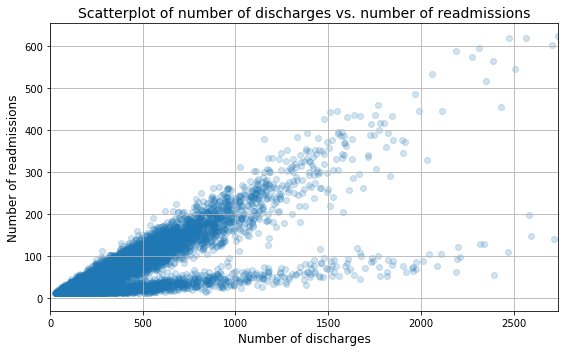

In [93]:
# generate a scatterplot for number of discharges vs. number of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Number of Readmissions'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Number of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. number of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

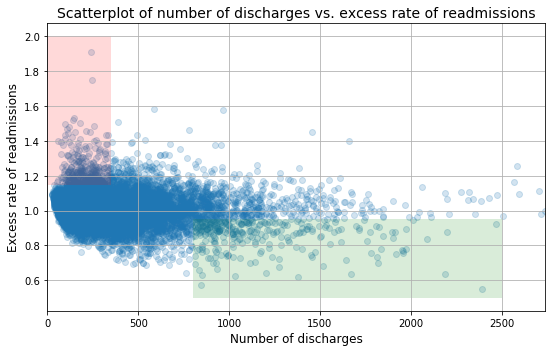

In [95]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

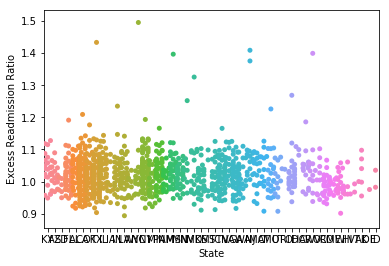

In [97]:
import seaborn as sns
_ = sns.swarmplot(x='State',y='Excess Readmission Ratio',data=small_hospital)

# Label the axes
plt.xlabel('State')
plt.ylabel('Excess Readmission Ratio')
# Show the plot
plt.show()

****
****
### Self-exploratory

In [11]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [60]:
small_hospital.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [61]:
big_hospital.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
11757,FLETCHER ALLEN HOSPITAL OF VERMONT,470003,VT,READM-30-AMI-HRRP,1002,NaN,0.9192,14.0,15.2,136.0,07/01/2010,06/30/2013
821,CRITTENTON HOSPITAL MEDICAL CENTER,230254,MI,READM-30-HIP-KNEE-HRRP,1004,NaN,1.1405,6.1,5.4,64.0,07/01/2010,06/30/2013
2363,YUMA REGIONAL MEDICAL CENTER,30013,AZ,READM-30-PN-HRRP,1007,NaN,1.0760,18.5,17.2,191.0,07/01/2010,06/30/2013
7188,EVANSTON HOSPITAL,140010,IL,READM-30-COPD-HRRP,1007,NaN,0.9930,20.0,20.2,201.0,07/01/2010,06/30/2013
2341,KING'S DAUGHTERS' MEDICAL CENTER,180009,KY,READM-30-PN-HRRP,1008,NaN,1.0765,21.0,19.5,216.0,07/01/2010,06/30/2013


In [64]:
print(small_hospital['Excess Readmission Ratio'].isna().sum())
print(big_hospital['Excess Readmission Ratio'].isna().sum())

81
0


In [65]:
print(clean_hospital_read_df['Excess Readmission Ratio'].isna().sum())

81


**NOTE** The first 81 rows in the clean_hospital_read_df and small_hospital dataframes only contain NaN

## End of self-exploratory
****
****

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis
****